In [1]:
import glob
import pandas as pd
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
fileList = sorted(glob.glob("./bangalore-sentiment/*"))

In [3]:
sentimentList = []
for idx, file in enumerate(fileList):
    clear_output(wait=True)
    df = pd.read_csv(file)
    scores = df.iloc[:, -3:]
    sentimentCount = dict(pd.DataFrame(scores.idxmax(axis=1)).groupby(0).size())
    sentimentList.append(sentimentCount)

In [4]:
qf = pd.DataFrame(sentimentList)

In [5]:
qf["sentimentIndex"] = (qf["positive"]*1)+(-1*qf["negative"])
qf["sentimentRatio"] = qf["positive"]/qf["negative"]

In [6]:
qf["total"] = qf["positive"]+qf["negative"]+qf["neutral"]

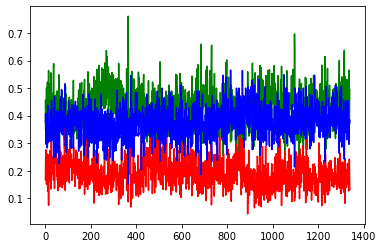

In [7]:
plt.plot(qf["positive"]/qf["total"], color="green")
plt.plot(qf["negative"]/qf["total"], color="red")
plt.plot(qf["neutral"]/qf["total"], color="blue")

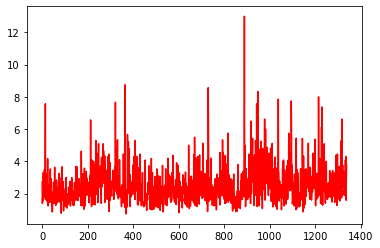

In [8]:
# plt.plot(qf["sentimentIndex"], color="blue") 
plt.plot(qf["sentimentRatio"], color="red")

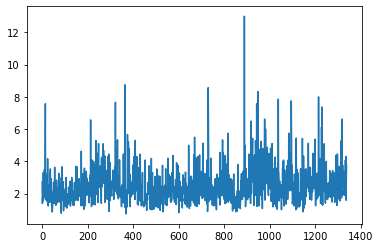

In [9]:
plt.plot(qf["sentimentRatio"])

In [10]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[N:] - cumsum[:-N]) / N

In [11]:
rm = running_mean(list(qf["sentimentRatio"]), 30)

In [412]:
rm.shape[0]

1310

In [12]:
x = np.arange(rm.shape[0])

In [13]:
np.arange(rm.shape[0], steps=30)

TypeError: 'steps' is an invalid keyword argument for arange()

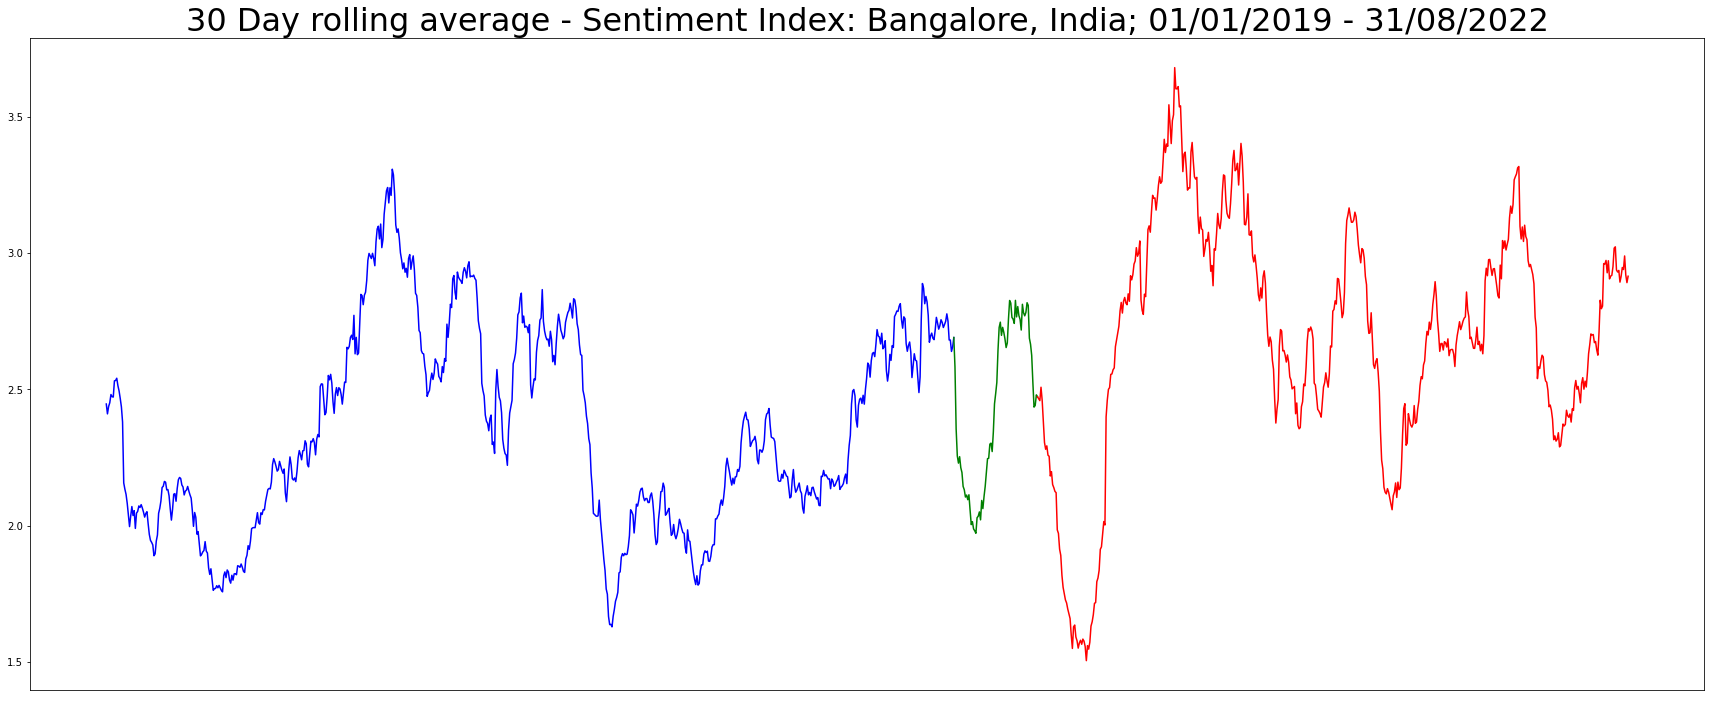

In [14]:
offset = 730
offset2 = 730+72
plt.figure(figsize=(30, 12))
plt.plot(x[:offset], rm[:offset], color="blue")
plt.plot(x[offset-1:offset2], rm[offset-1:offset2], color="green")
plt.title("30 Day rolling average - Sentiment Index: Bangalore, India; 01/01/2019 - 31/08/2022", fontdict={'fontsize': 32})
plt.xticks([],[])
plt.plot(x[offset2-1:], rm[offset2-1:], color="red")
plt.savefig("./result.jpg")

In [390]:
datetime.date(2019, 1, 1)

datetime.date(2019, 1, 1)

In [405]:
xfmt = mdates.DateFormatter('%d-%m-%y')
dates = pd.date_range(start='1/1/2019', end='31/08/2022', periods=30)

/var/folders/d3/j839_0sx7t12h9n4f6knshwr0000gn/T/ipykernel_21081/707696079.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dates = pd.date_range(start='1/1/2019', end='31/08/2022', periods=30)


In [17]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import matplotlib.dates as mdates
# times = pd.date_range(start='1/1/2019', end='31/08/2022', periods=30)

# fig, ax = plt.subplots(1)
# fig.autofmt_xdate()
# plt.plot(times, range(times.size))


# ax.xaxis.set_major_formatter(xfmt)

In [410]:
dates = pd.date_range(start='1/1/2019', end='31/08/2022')

/var/folders/d3/j839_0sx7t12h9n4f6knshwr0000gn/T/ipykernel_21081/1755928731.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dates = pd.date_range(start='1/1/2019', end='31/08/2022')
